## Questão 4: Regressão Linear

Dado o seguinte conjunto de dados sobre o preço de casas:

- Área (m²): [70, 100, 120, 200]
- Preço (mil): [200, 300, 350, 500]

### Perguntas Práticas:

1. Utilize regressão linear para encontrar os pesos que melhor ajustam o modelo para prever o preço com base na área.
2. A partir dos dados, faça um gráfico com a linha de regressão linear.
3. Sugira transformações de features que poderiam melhorar a performance do modelo.
4. Analise o coeficiente de determinação \(R^2\) para avaliar o ajuste do modelo.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [22]:
#Para encontrarmos o intercepto (θ0), precisamos incluir uma coluan de 1's 
# na matriz X para representar o intercepto do modelo. Código resolvendo com a equação normal.

# Dados fornecidos: Área (m²) e Preço (mil)
x = np.array([[70], [100], [120], [200]])
y = np.array([[200], [300], [350], [500]])

# Adicionando a coluna de 1's para o intercepto (termo de bias)
X_b = np.hstack([np.ones((x.shape[0], 1)), x])

# Equação normal: theta = (X.T * X)^(-1) * X.T * y
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Mostrando os valores de theta
print(f'Intercepto (θ0): {theta[0][0]}')
print(f'Coeficiente angular (θ1): {theta[1][0]}')


Intercepto (θ0): 65.09433962264163
Coeficiente angular (θ1): 2.223719676549866


In [23]:
#Código resolvendo com o Scikit-Learn, LinearRegression.

# Dados fornecidos: Área (m²) e Preço (mil)
area = np.array([70, 100, 120, 200]).reshape(-1, 1)
preco = np.array([200, 300, 350, 500])

# 1. Ajustando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(area, preco)

# Coletando os pesos da regressão
intercepto = modelo.intercept_
coeficiente = modelo.coef_

print(f'Intercepto (θ0): {intercepto}')
print(f'Coeficiente angular (θ1): {coeficiente[0]}')


Intercepto (θ0): 65.09433962264154
Coeficiente angular (θ1): 2.223719676549865


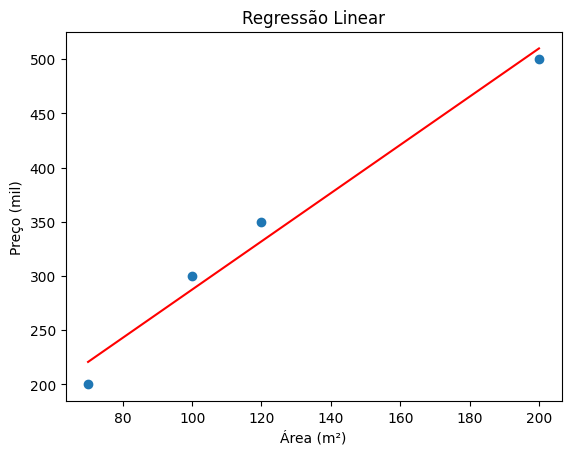

In [24]:

#Gerando o gráfico
plt.scatter(area, preco)
plt.plot(area, modelo.predict(area), color='red')
plt.title('Regressão Linear')
plt.xlabel('Área (m²)')
plt.ylabel('Preço (mil)')
plt.show()




### Perguntas Teóricas:

1. **Explique o conceito de regressão linear e como ela funciona.**
   - Resposta: A regressão linear é um modelo que assume uma relação linear entre a variável independente (input) e a variável dependente (output). Ela ajusta uma linha reta aos dados, minimizando a soma dos erros quadrados entre as previsões e os valores reais.

2. **O que é o coeficiente de determinação \(R^2\)?**
   - Resposta: \(R^2\) mede a proporção da variabilidade dos dados que é explicada pelo modelo de regressão. Valores próximos de 1 indicam que o modelo explica bem os dados, enquanto valores próximos de 0 indicam um ajuste fraco.

3. **O que é feature engineering e qual sua importância na regressão linear?**
   - Resposta: Feature engineering é o processo de criar novas variáveis a partir dos dados brutos para melhorar o desempenho do modelo. Na regressão linear, transformar as features (como criar interações ou polinômios) pode melhorar o ajuste do modelo às relações não lineares presentes nos dados.